In [ ]:
#Has to be run twice most of the time (restart runtime inbetween)
!apt-get -qq install -y libspatialindex-dev
!pip install osmnx
!pip install geopandas

Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-c4v5:amd64.
Preparing to unpack .../libspatialindex-c4v5_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-c4v5:amd64 (1.8.5-5) ...
Selecting previously unselected package libspatialindex-dev:amd64.
Preparing to unpack .../libspatialindex-dev_1.8.5-5_amd64.deb ...
Unpacking libspatialindex-dev:amd64 (1.8.5-5) ...
Setting up libspatialindex4v5:amd64 (1.8.5-5) ...
Setting up libspatialindex-c4v5:amd64 (1.8.5-5) ...
Setting up libspatialindex-dev:amd64 (1.8.5-5) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 95 kB 3.3 MB/s 
  

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

ox.config(use_cache=True, log_console=True)

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:872: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  outer_polygons_with_holes.extend(list(outer_polygon))
/usr/local/lib

ValueError: ignored

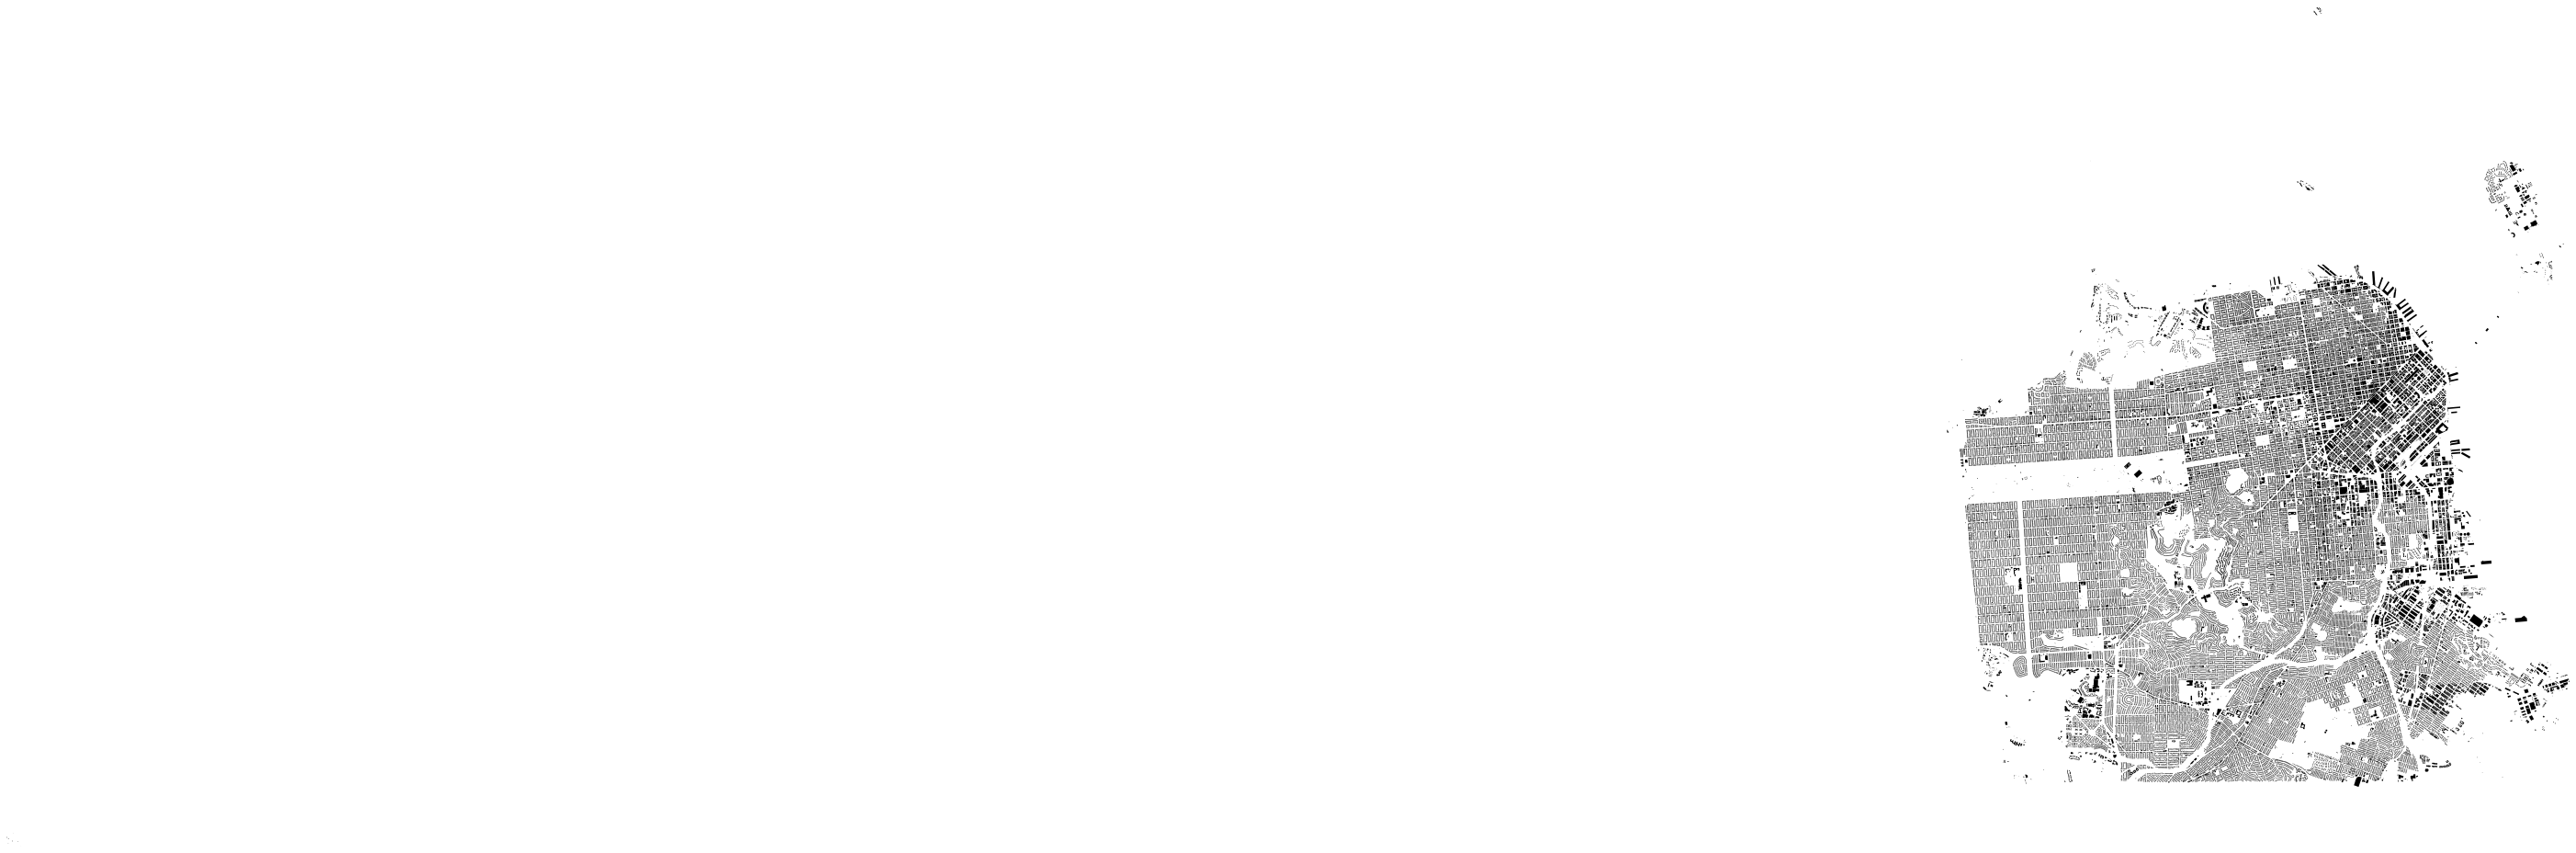

In [ ]:
place_name = "San Francisco, Kalifornien, USA"
gdf = ox.geometries_from_place(place_name, {'building': True})
gdf = gdf.to_crs("EPSG:32710")
g = ox.plot_footprints(gdf, figsize=(50, 50),bgcolor="white",save = True, filepath = "plot", dpi=700, color ="black")

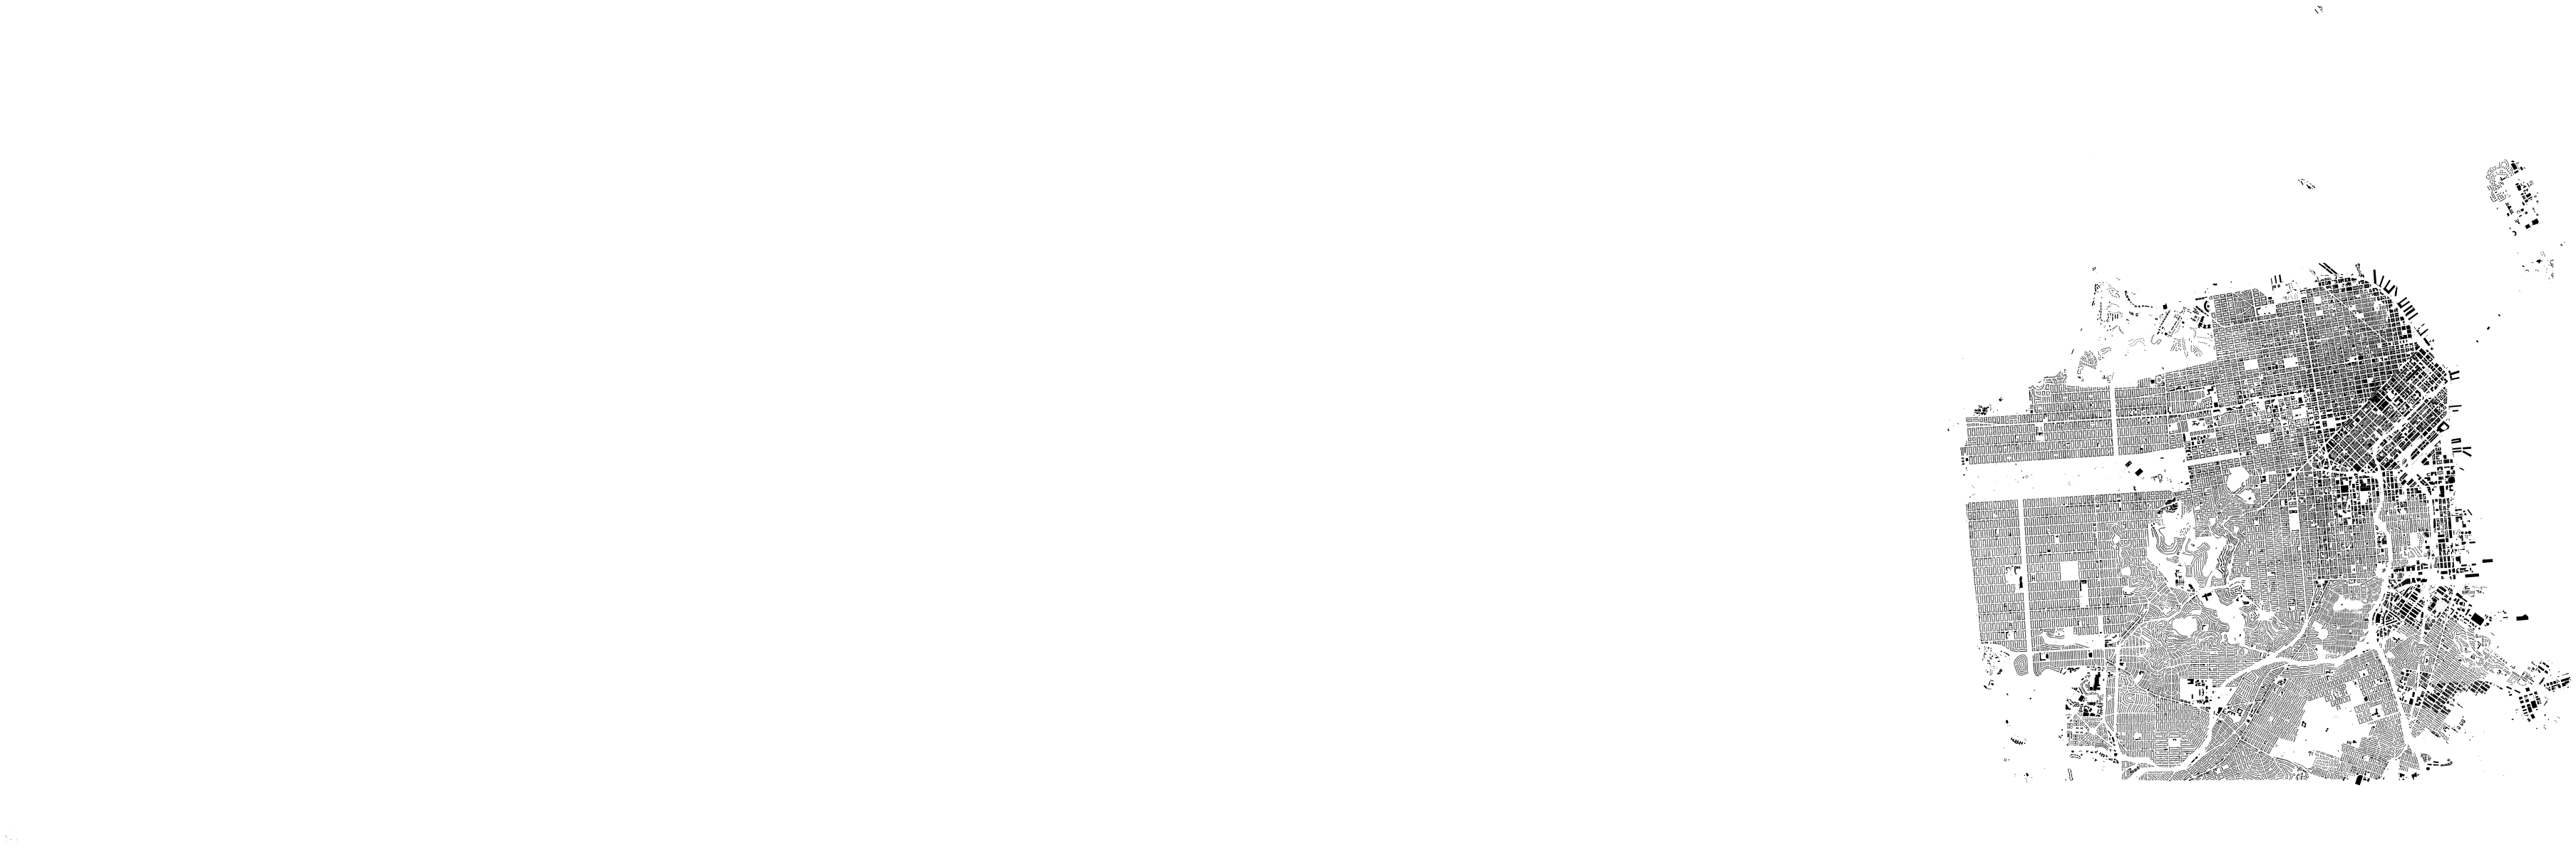

In [ ]:
g = ox.plot_footprints(gdf, figsize=(50, 50),bgcolor="white",save = True, filepath = "plot.svg", color ="black")

In [ ]:
#safe the centroid of every polygon in longitude and latitude
gdf["latitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)
gdf["longitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)
#gdf["newPoint"] = gdf.applymap(lambda row: row.geometry.centroid)
gdf

amenity  ...      longitude
element_type osmid              ...               
node         140982745     NaN  ...  550008.223325
             140982928     NaN  ...  552876.758494
             320089199     NaN  ...  552452.130017
             368166277     NaN  ...  551828.202770
             368166280     NaN  ...  550236.665854
...                        ...  ...            ...
relation     12657685      NaN  ...  551543.211700
             12678892      NaN  ...  550633.788158
             12678899      NaN  ...  551831.365769
             12734194      NaN  ...  553699.007724
             13508742      NaN  ...  551675.992688

[160389 rows x 394 columns]

In [ ]:
gdf.to_csv("san_francisco.csv",columns=['latitude','longitude'])